# Prosper Loan Data Exploration
## by Ahmed Khaled Mohamed Salah Abdelrahman

## Investigation Overview

> In our investigation through visualizations, we aim to look at the effect of some features to the amount of loan.

## Dataset Overview

> This dataset is a financial dataset and this is related to the loan, borrowers, lenders, interest rates and stuffs like that. Prosper or Prosper Marketplace Inc. is a San Francisco, California based company specializing in loans at low interest rates to the borrowers. In this dataset, we are using the data from the Posper to analyse it and trying to find the pattern in the Prosper data. [[*]](https://rstudio-pubs-static.s3.amazonaws.com/284488_195ef48d299e46f5b009987c8b988b69.html)

> Our data set contains 69K records and we focus on 13 features.


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
loans_dataset = pd.read_csv("prosperLoanData.csv")


loans_dataset = loans_dataset.rename(columns = {
    'ProsperRating (numeric)' : 'ProsperRating_numeric',
    'ProsperRating (Alpha)': 'ProsperRating_alpha',
    'ListingCategory (numeric)': 'ListingCategory_numeric',
    'TradesNeverDelinquent (percentage)': 'TradesNeverDelinquent_percentage'
})


loans_dataset['IncomeRange'] = loans_dataset['IncomeRange'].map({
    '$0': '0',
    '$1-24,999': '1-25K',
    '$25,000-49,999': '25K-50K',
    '$50,000-74,999': '50K-75K',
    '$75,000-99,999': '75K-100K',
    '$100,000+': '100K+',
    'Not displayed': 'Not displayed',
    'Not employed': 'Not employed'
})

features = list('BorrowerState LoanStatus LenderYield Occupation EmploymentStatus EmploymentStatusDuration CurrentlyInGroup IncomeRange StatedMonthlyIncome Investors ProsperRating_numeric LoanOriginalAmount BorrowerRate'.split())

categorial_features = list('BorrowerState LoanStatus EmploymentStatus CurrentlyInGroup IncomeRange ProsperRating_numeric'.split())


categorial_features_ordered = {
    'LoanStatus': list('Current,FinalPaymentInProgress,Completed,Chargedoff,Cancelled,Defaulted,Past Due (1-15 days),Past Due (16-30 days),Past Due (31-60 days),Past Due (61-90 days),Past Due (91-120 days),Past Due (>120 days)'.split(',')),
    'EmploymentStatus': list('Self-employed,Employed,Full-time,Part-time,Not employed,Not available,Other,Retired'.split(',')),
    'IncomeRange': list('Not employed|0|1-25K|25K-50K|50K-75K|100K+|Not displayed'.split('|')),
    'ProsperRating_numeric': list(range(1, 8))    
}

loans_dataset = loans_dataset[features]

for ord_cat in categorial_features_ordered.keys():
    order = pd.api.types.CategoricalDtype(ordered=True, categories = categorial_features_ordered[ord_cat])
    loans_dataset[ord_cat] = loans_dataset[ord_cat].astype(order)
    
loans_dataset.dropna(inplace=True)

loans_dataset.reset_index(inplace=True)
loans_dataset.drop(columns = 'index', axis = 1, inplace=True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Occupation

There are 68 occupations listed in the dataset. We will focus on the most common 25 ones. 'Professional' is the most common occupation among the borrowers with 11.6%. 'Executive', 'Administrative Assistant', and 'Teacher' comes next with about 4% each.

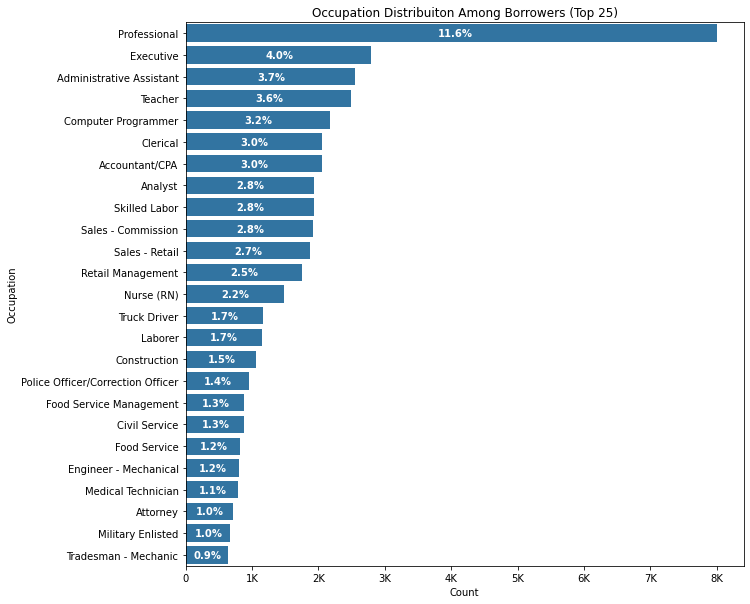

In [4]:
occupation_count = loans_dataset.Occupation.value_counts()[1:26] # 1 to remove Other...

blue_color = sb.color_palette()[0]

occupation_filtered = loans_dataset[loans_dataset.Occupation.isin(occupation_count.index)]
plt.figure(figsize=[10, 10])
sb.countplot(
    data = occupation_filtered,
    y = 'Occupation',
    color = blue_color,
    order = occupation_count.index
);

tot = loans_dataset.shape[0]

for i in range(len(occupation_count)):
    percentage = '{:.1f}%'.format(occupation_count[i] * 100 / tot)
    plt.text(occupation_count[i] / 2 - 200, i, percentage, va = 'center', color = 'w', weight = 'bold');
    
plt.xlabel("Count");
x_pos = np.arange(0, 9000, 1000)
x_labels = ['0' if x == 0 else '{}K'.format(x//1000) for x in x_pos]
plt.xticks(x_pos, x_labels);
plt.title("Occupation Distribuiton Among Borrowers (Top 25)");

## Income

Among 69 thousand borrowers, 37% have income in the range of 50K-75K, 34% are in the range of 25K-50K and 22% gain income of 100K and more. Less than 1% are not employed. And About 5000 borrowers have stated they don't earn any income.

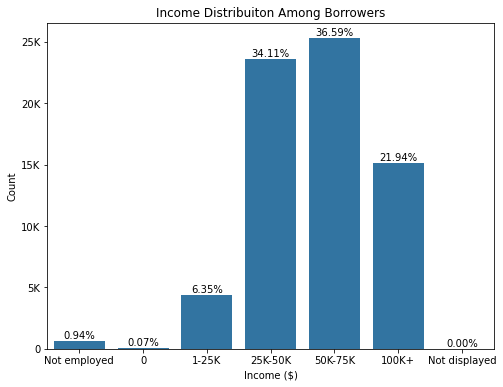

In [5]:
plt.figure(figsize = [8, 6])
sb.countplot(
    data = loans_dataset,
    x = 'IncomeRange',
    color = blue_color
);
plt.xlabel("Income ($)")
plt.ylabel("Count");

total = loans_dataset.shape[0]

income_counts = loans_dataset.IncomeRange.value_counts()

income_labels = 'Not employed|0|1-25K|25K-50K|50K-75K|100K+|Not displayed'.split('|')

for i in range(len(income_counts)):
    cat = income_labels[i]
    count = income_counts[cat]
    percentage = '{:.2f}%'.format(count / total * 100)
    plt.text(i, count + 200, percentage, ha = 'center');
    
plt.title("Income Distribuiton Among Borrowers")
y_pos = np.arange(0, 30000, 5000)
y_labels = ['0' if y == 0 else '{}K'.format(y//1000) for y in y_pos]
plt.yticks(y_pos, y_labels);

## Prosper Rating

The distribution of the prosper rating shows a uni-modal curve at the rating 4 with 21.5%. On both sides the curve tends to decrease until it reaches a tail at rating 1 with 8.76% and rating 7 with 5.93%. The middle values are ratings 3, 5, 6 with about 17% percent each. Rating 2 was given by Prosper to 12% of the borrowers.

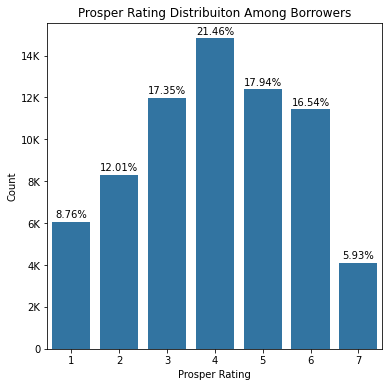

In [6]:
plt.figure(figsize = [6, 6])

sb.countplot(
    data = loans_dataset,
    x = 'ProsperRating_numeric',
    color = blue_color
);

plt.xlabel("Prosper Rating");

rating_counts = [6057, 8301, 11987, 14833, 12395, 11432, 4101]

rating_labels = list(range(1, 8))

for i in range(len(rating_counts)):
    percentage = '{:.2f}%'.format(rating_counts[i] / total * 100)
    plt.text(i, rating_counts[i] + 200, percentage, ha = 'center')
    
plt.yticks(np.arange(0, 16000, 2000), '0 2K 4K 6K 8K 10K 12K 14K'.split());

plt.ylabel("Count")
plt.title("Prosper Rating Distribuiton Among Borrowers");

## Investors vs Loan Original Amount

A direct realtionship can be obtained between the number of investors and the original amount of loan. The majority of the borrowers who have more than 300 investors have got loans with amounts that surpass 15K \$.


In [7]:
sample = np.random.choice(a = loans_dataset.shape[0], size = 500, replace = False)

loans_sample = loans_dataset.loc[sample, :]

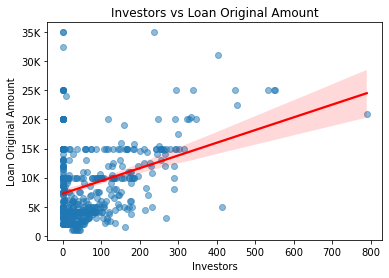

In [8]:
sb.regplot(
    data = loans_sample.query("Investors != 0"),
    x = 'Investors',
    y = 'LoanOriginalAmount',
    fit_reg = True,
    x_jitter = 1,
    scatter_kws = {'alpha': 0.5},
    line_kws = {'color': 'r'}
);

plt.ylabel("Loan Original Amount");

y_pos = np.arange(0, 40000, 5000)
y_labels = ['0' if y == 0 else '{}K'.format(y//1000) for y in y_pos]

plt.yticks(y_pos, y_labels);

plt.title("Investors vs Loan Original Amount");

## Prosper Rating vs Loan Original Amount

We can deduce that the borrower with a Prosper rating of 4 or above is more likely to get a loan higher than 10K \\$. The majority of the borrowers who have a rating of 4, 5, 6, 7 got loans with amount in the range (5000, 15000). Surprisingly, the highest amount listed in the data is in the rating 6 not 7. Nearly all borrowers with a rating of 1 gets loans of 4500 \\$, even if others with rating 1 got more than 5000\\$.

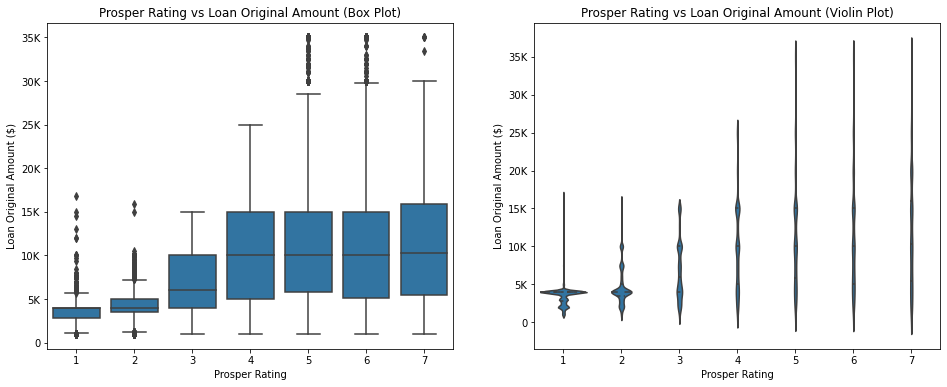

In [9]:
plt.figure(figsize = (16, 6))

y_pos = np.arange(0, 40000, 5000)
y_labels = ['0' if y == 0 else '{}K'.format(y//1000) for y in y_pos]


plt.subplot(1, 2, 1)
sb.boxplot(data = loans_dataset, x = 'ProsperRating_numeric', y = 'LoanOriginalAmount', color = sb.color_palette()[0]);
plt.xlabel("Prosper Rating")
plt.ylabel("Loan Original Amount ($)")
plt.yticks(y_pos, y_labels);
plt.title("Prosper Rating vs Loan Original Amount (Box Plot)")



plt.subplot(1, 2, 2)
sb.violinplot(data = loans_dataset, x = 'ProsperRating_numeric', y = 'LoanOriginalAmount', color = sb.color_palette()[0], inner = 'quartile');
plt.xlabel("Prosper Rating")
plt.ylabel("Loan Original Amount ($)");
plt.yticks(y_pos, y_labels);
plt.title("Prosper Rating vs Loan Original Amount (Violin Plot)");



## Prosper Rating vs Investors

As seen, with higher prosper rating, a higher number investors the borrower get. Few borrowers got a rating of 7, but they still manage to attract more investors.

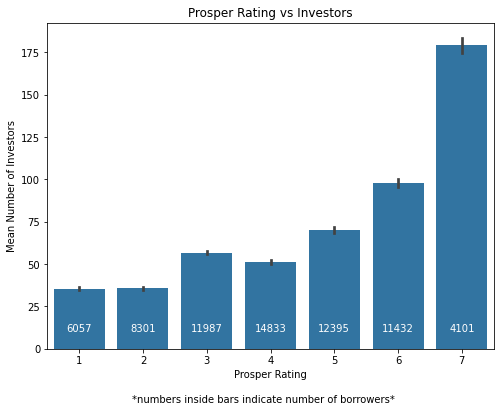

In [10]:
plt.figure(figsize = [8, 6])
sb.barplot(
    data = loans_dataset,
    x = 'ProsperRating_numeric',
    y = 'Investors',
    color = blue_color,
    ci = 95
)

for i in range(len(rating_counts)):
    count = rating_counts[i]
    plt.text(i, 10, count, ha = 'center', color = 'w')

plt.xlabel("Prosper Rating");
plt.ylabel("Mean Number of Investors")
plt.title("Prosper Rating vs Investors");
plt.figtext(0.5, 0, '*numbers inside bars indicate number of borrowers*', horizontalalignment='center');

## Prosper Rating vs Investors vs Currently In Group

Having a higher Prosper rating helps you attract more investors, but combining the grade with working in a group helps you even more. With high ratings, the number of investors increases with the acknowledge of being in a group more than individually.

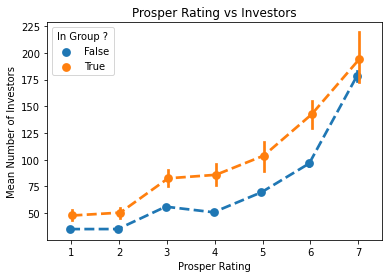

In [11]:
sb.pointplot(
    data = loans_dataset,
    x = 'ProsperRating_numeric',
    y = 'Investors',
    hue = 'CurrentlyInGroup',
    dodge = True,
    linestyles = '--'
);
plt.xlabel("Prosper Rating")
plt.ylabel("Mean Number of Investors")
plt.title("Prosper Rating vs Investors");
plt.legend(title = "In Group ?");

## Income vs Loan Original Amount vs Prosper Rating

Considering taking each Prosper rating separately, we can deduce that the amount change of the loan is higher with the change in the income level in the ratings of 4, 5, 6, and 7. The ratings of 1, 2, and 3 don't show that high gradient.

Surprisingly, A rating of 7 showed a lower mean of loan amount that lower ratings 5, and 6.

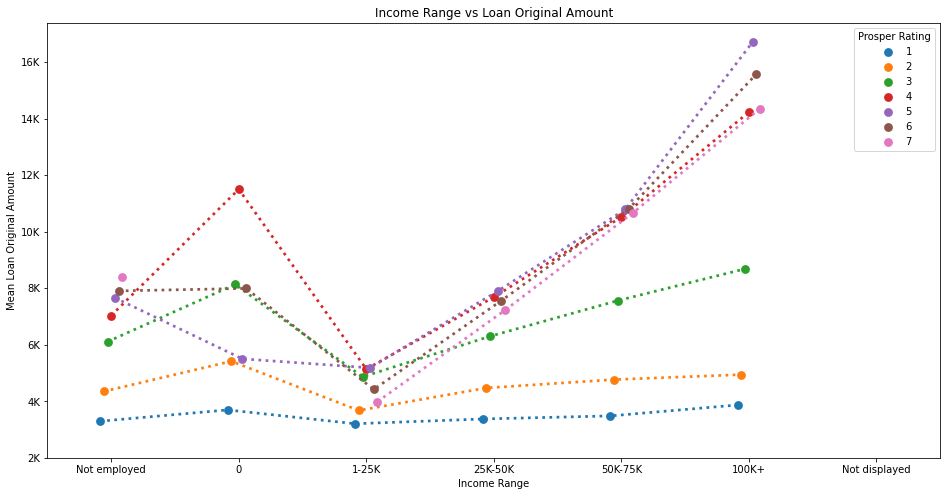

In [12]:
plt.figure(figsize = [16, 8])
sb.pointplot(
    data = loans_dataset,
    x = 'IncomeRange',
    y = 'LoanOriginalAmount',
    hue = 'ProsperRating_numeric',
    linestyles = ':',
    ci = None,
    dodge = True
)
plt.legend(title = 'Prosper Rating')
plt.xlabel("Income Range")
plt.ylabel("Mean Loan Original Amount");

y_pos = np.arange(2000, 18000, 2000)
y_labels = ['0' if y == 0 else '{}K'.format(y//1000) for y in y_pos]
plt.yticks(y_pos, y_labels);

plt.title("Income Range vs Loan Original Amount");